# Bank Customer Churn

## Exploratory Data Analysis
A churned customer is defined as one who does not have up to one customer-induced transaction on any of their accounts. Customer churn poses a significant problem for the banking sector and influences both profitability and customer retention.

#### Software Dependences

* Python 3.9.7
* Tensorflow 2.10.1
* Pandas 1.5.3
* Numpy 1.22.4


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Deep learning libraries
import tensorflow as tf

#DL library to use forward and backward propogation
from tensorflow.keras.models import Sequential

#DL library to build input/hidden/output layers
from tensorflow.keras.layers import Dense

#DL library to prevent overfitting
from tensorflow.keras.layers import Dropout

#DL library to use activation function
from tensorflow.keras.layers import LeakyReLU, ReLU

#DL library to use optimizer
from tensorflow.keras.optimizers import Adam

In [2]:
#load in data

df = pd.read_csv('churn.csv')
df.drop('RowNumber',axis=1,inplace=True)

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
# view summary statistics 
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


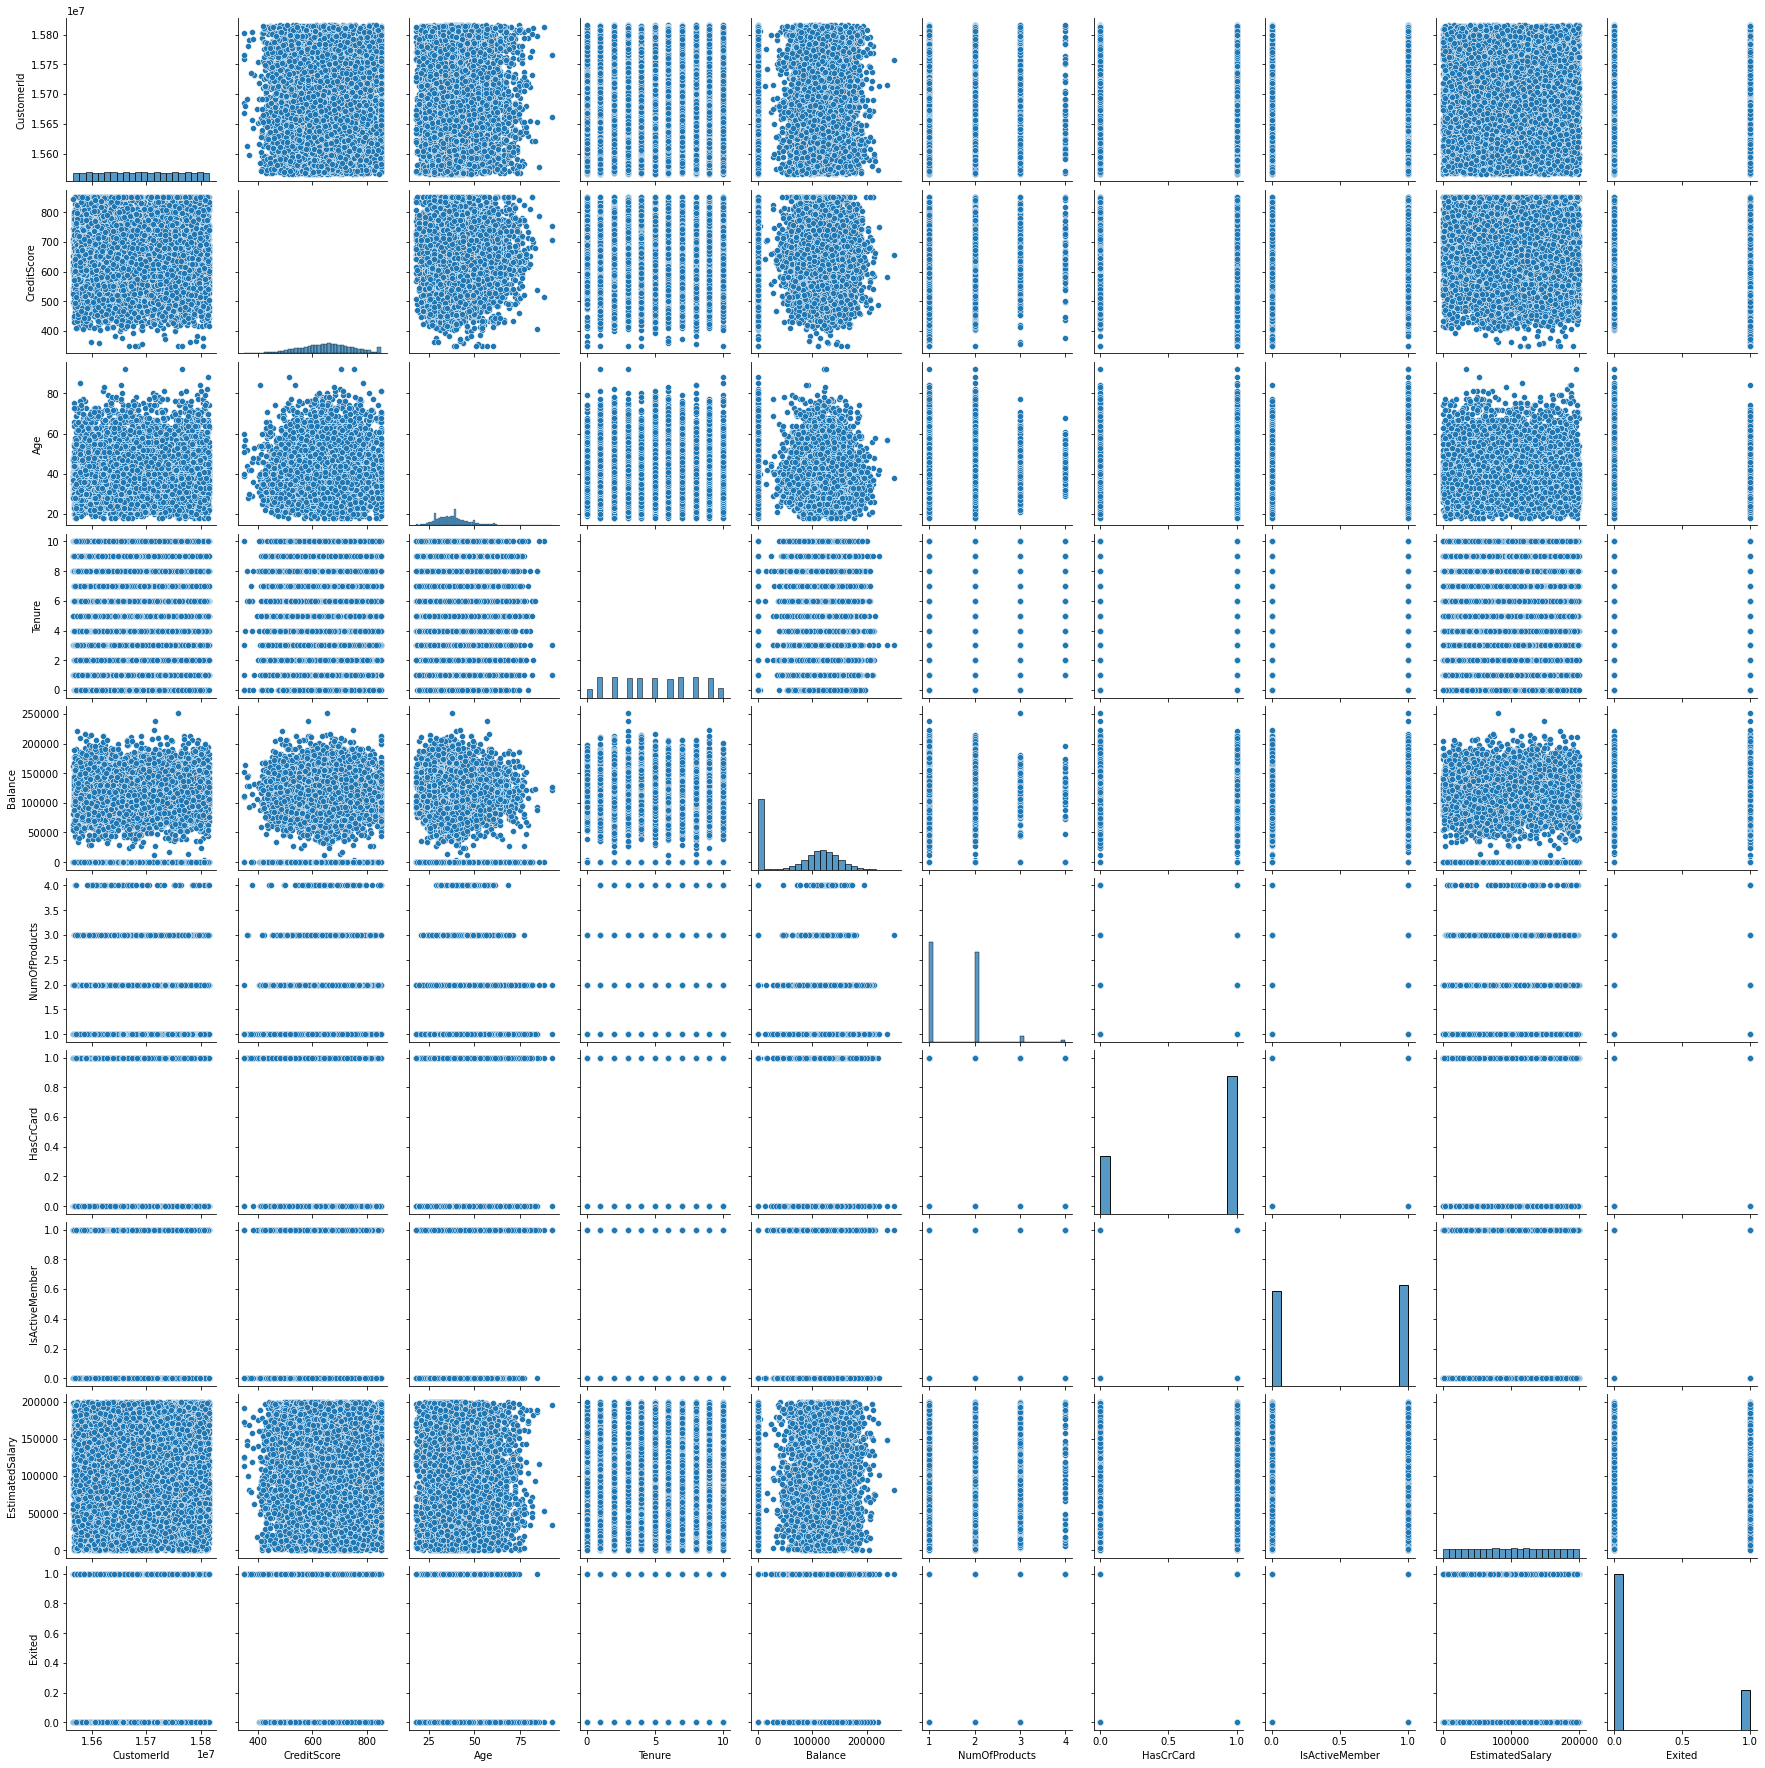

In [6]:
# create pair plot of all columns 
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>],
       [<AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

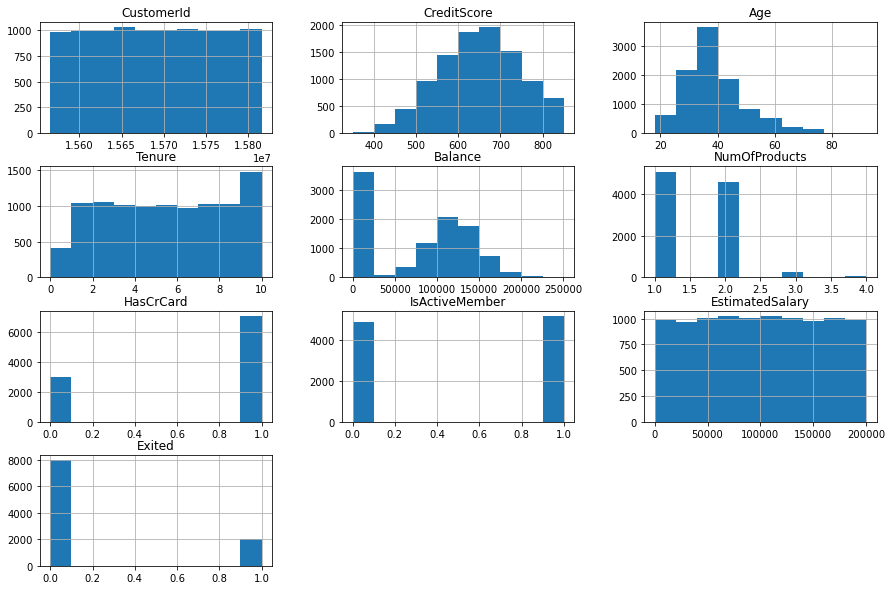

In [7]:
# create histograms of all columns
df.hist(figsize=(15,10))

0    7963
1    2037
Name: Exited, dtype: int64
Percentage distribution for exited vs non exited
0    0.7963
1    0.2037
Name: Exited, dtype: float64


Text(0.5, 1.0, 'Distribution of Exited vs non-Exited Customers')

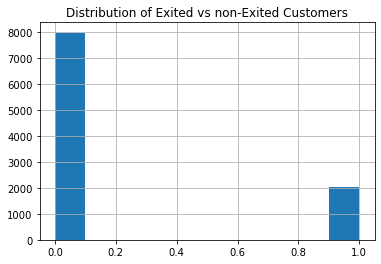

In [8]:
# distribution of exited vs active
print(df.Exited.value_counts())


print('Percentage distribution for exited vs non exited')
print(df.Exited.value_counts(normalize=True))


df.Exited.hist()
plt.title('Distribution of Exited vs non-Exited Customers')

### Bivariate Analysis

Here, I'll do more comparisons for 2 variables at a time to determine what variables have influence over others

Text(0.5, 1.0, 'Balances by Exited Status')

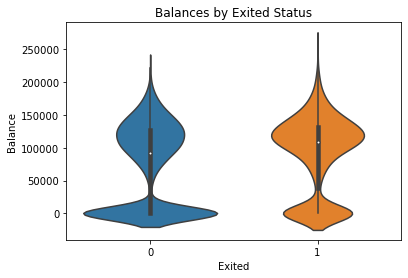

In [9]:
sns.violinplot(y=df.Balance,x=df.Exited)
plt.title('Balances by Exited Status')

Text(0.5, 1.0, 'Zero Balances by Exited Status')

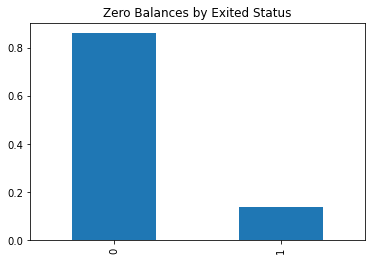

In [10]:
df[df.Balance==0].Exited.value_counts(normalize=True).plot.bar()
plt.title('Zero Balances by Exited Status')

Text(0.5, 1.0, 'Credit Score by Exited Status')

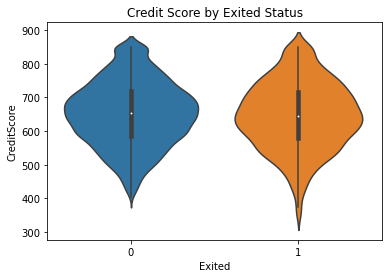

In [11]:
sns.violinplot(y=df.CreditScore,x=df.Exited)
plt.title('Credit Score by Exited Status')

Text(0.5, 1.0, 'Estimated Salary by Exited Status')

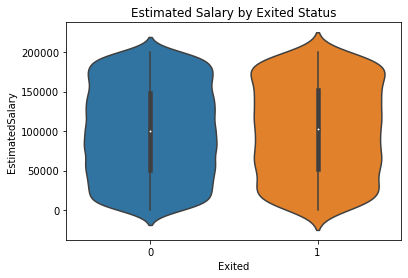

In [12]:
sns.violinplot(y=df.EstimatedSalary,x=df.Exited)
plt.title('Estimated Salary by Exited Status')

Text(0.5, 1.0, 'Tenure by Exited Status')

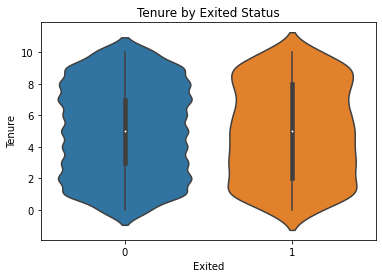

In [13]:
sns.violinplot(y=df.Tenure,x=df.Exited)
plt.title('Tenure by Exited Status')

Text(0.5, 1.0, 'Age by Exited Status')

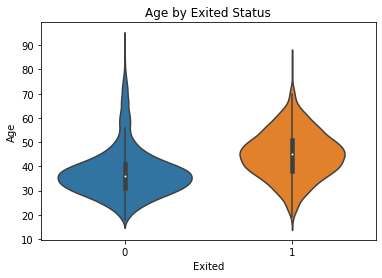

In [14]:
sns.violinplot(y=df.Age,x=df.Exited)
plt.title('Age by Exited Status')

In [15]:
# mean age of exited vs non-exited

print('Mean age of exited customers: ',df[df.Exited==1].Age.mean().round())
print('Mean age of non-exited customers: ',df[df.Exited==0].Age.mean().round())

# median age of exited vs non-exited
print('Median age of exited customers: ',df[df.Exited==1].Age.median())
print('Median age of non-exited customers: ',df[df.Exited==0].Age.median())

Mean age of exited customers:  45.0
Mean age of non-exited customers:  37.0
Median age of exited customers:  45.0
Median age of non-exited customers:  36.0


In [16]:
# 25th percentile exited
df[df.Exited==1].Age.quantile(0.25)

38.0

The top 75% of exited customers are older than 38 years

In [17]:
# 25th percentile
df[df.Exited==0].Age.quantile(0.25)

31.0

The top 75% of non-exited customers are older than 31 years.

50% of exited customers fall between the ages of 38 and 51

In general, exited customers are older than non-exited customers

Text(0.5, 1.0, 'NumOfProducts by Exited Status')

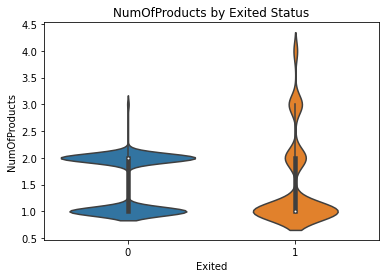

In [18]:
sns.violinplot(y=df.NumOfProducts,x=df.Exited)
plt.title('NumOfProducts by Exited Status')

Text(0.5, 1.0, 'IsActiveMember by Exited Status')

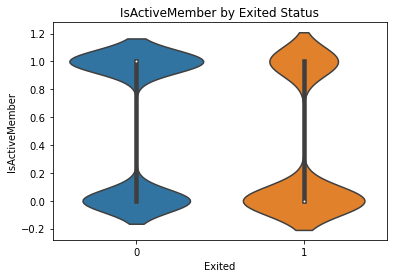

In [19]:
sns.violinplot(y=df.IsActiveMember,x=df.Exited)
plt.title('IsActiveMember by Exited Status')

### Multivariate Analysis

In this section, I will attempt to analyze more than 2 variables at a time to find more complex relationships between variables

Text(0.5, 1.0, 'Age vs Credit Score vs Exited Status')

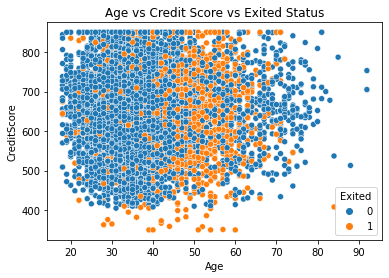

In [20]:
sns.scatterplot(x='Age', y='CreditScore',data=df,hue='Exited')
plt.title('Age vs Credit Score vs Exited Status')

While age does not see mto be a significant influence over credit score, it does affect exited status.

It is also clear that, although they are not mamy, customers who have the lowest credit scores (much lower than 400) are exited.
More than half of exited customers fall within the ages of 40 and 60

Text(0.5, 1.0, 'Balance vs Estimated Salary vs Exited Status')

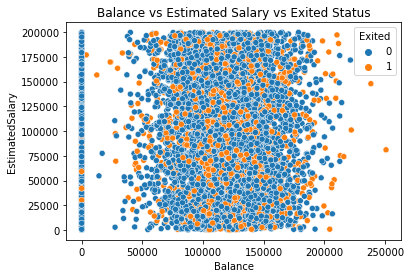

In [21]:
sns.scatterplot(x='Balance', y='EstimatedSalary',data=df,hue='Exited')
plt.title('Balance vs Estimated Salary vs Exited Status')

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

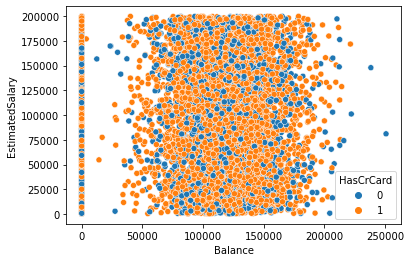

In [22]:
sns.scatterplot(x='Balance', y='EstimatedSalary',data=df,hue='HasCrCard')

Text(0.5, 1.0, 'Salary vs NumOfProducts vs Exited Status')

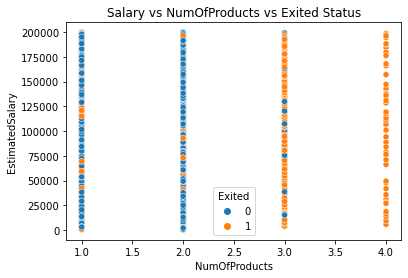

In [23]:
sns.scatterplot(x='NumOfProducts', y='EstimatedSalary',data=df,hue='Exited')
plt.title('Salary vs NumOfProducts vs Exited Status')

Customers with 3 or 4 products are more likely to be exited

In [24]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


There are no strong relationships among independent variables. This is good for linear modelling

In [25]:
#plot correlations
df.drop(['CustomerId','Surname','Geography','Gender'],axis=1).corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# Baseline Model

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [27]:
X = df.drop(['CustomerId','Surname','Geography','Gender','Exited'], axis=1)
y = df['Exited']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
dummy_dtc = DecisionTreeClassifier()

In [30]:
dummy_dtc.fit(X_train,y_train)
preds = dummy_dtc.predict(X_test)

In [31]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2416
           1       0.43      0.47      0.45       584

    accuracy                           0.78      3000
   macro avg       0.65      0.66      0.66      3000
weighted avg       0.78      0.78      0.78      3000



Text(0.5, 1.0, 'Feature importances: Baseline Model')

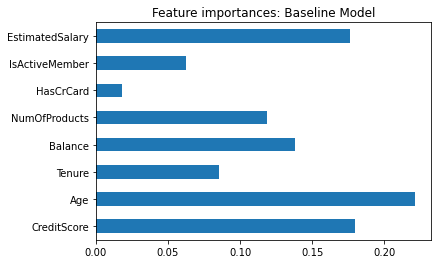

In [32]:
pd.Series(dummy_dtc.feature_importances_,X_train.columns).plot.barh()
plt.title('Feature importances: Baseline Model')

## Principal Component Analysis

In [33]:
from sklearn.decomposition import PCA


In [34]:
pca = PCA(n_components=2)
pca.fit(X_train)
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

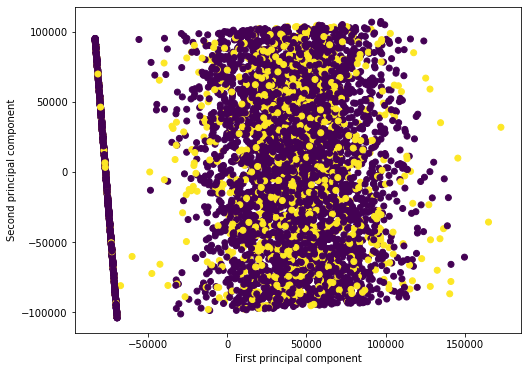

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [36]:
dummy_dtc.fit(x_train_pca,y_train)
preds_pca = dummy_dtc.predict(x_test_pca)

In [37]:
print(classification_report(y_test,preds_pca))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2416
           1       0.20      0.22      0.21       584

    accuracy                           0.68      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.69      0.68      0.68      3000



###  3 Principal Components

In [38]:
from mpl_toolkits.mplot3d import Axes3D

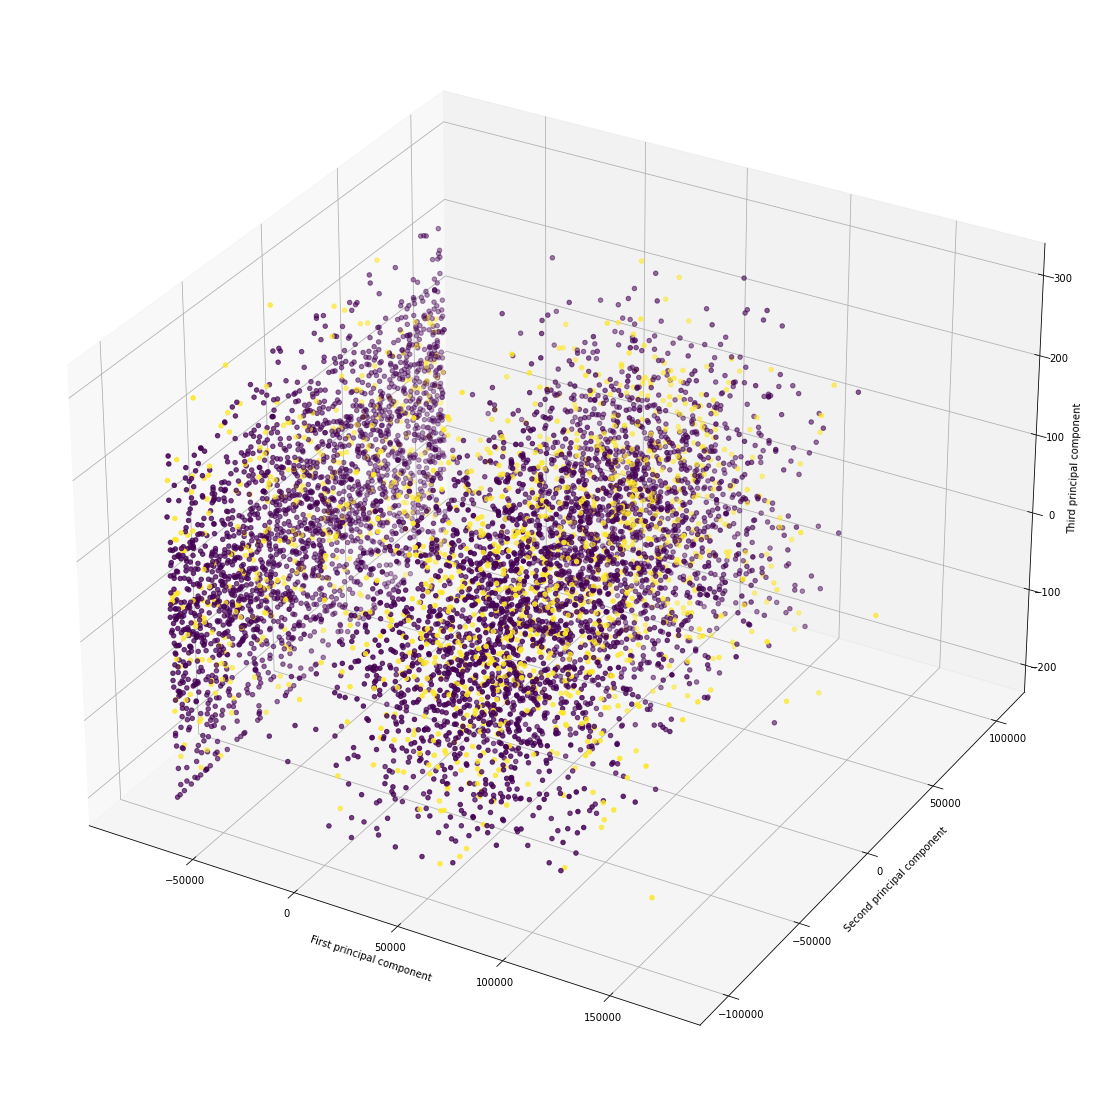

In [39]:
pca = PCA(n_components=3)
pca.fit(X_train)
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train_pca[:,0],x_train_pca[:,1],x_train_pca[:,2],c=y_train, marker='o')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.show()


In [40]:
dummy_dtc.fit(x_train_pca,y_train)
preds_pca = dummy_dtc.predict(x_test_pca)

print(classification_report(y_test,preds_pca))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2416
           1       0.20      0.22      0.21       584

    accuracy                           0.67      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.69      0.67      0.68      3000



There seems to be no significant improvement from using 3 principal components

## Clustering

In [41]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

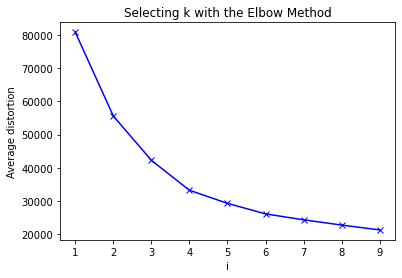

In [42]:
#to apply the elbow method to determine number of clusters
no_of_clusters = range(1,10)
meanDistortions = []

for i in no_of_clusters:
    clfmodel = KMeans(n_clusters=i,n_init=10)
    clfmodel.fit(X_train)
    clfmodel_pred = clfmodel.predict(X_train)

    meanDistortions.append(sum(np.min(cdist(X_train,clfmodel.cluster_centers_,'euclidean'),axis=1)) / X_train.shape[0])
    

plt.plot(no_of_clusters, meanDistortions, 'bx-')
plt.xlabel('i')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [43]:
#compare against silhouette coefficient

In [44]:
from sklearn.metrics import silhouette_score

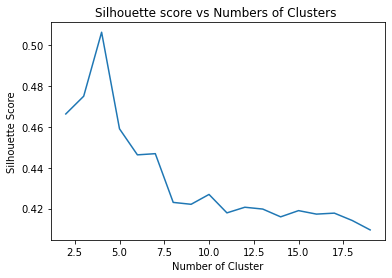

Optimal number :
4


In [45]:
silhouette  = []
no_of_cluster = range(2,20)

for i in no_of_cluster:
    model = KMeans(i,init='k-means++',n_init=10,max_iter=100,tol=0.0001, verbose=0, random_state=None, copy_x=True)
    model.fit(X_train)
    predict = model.predict(X_train)
    silhouette_score(X_train,predict,metric='euclidean')
    silhouette.append(silhouette_score(X_train,predict,metric='euclidean'))
    
plt.plot(no_of_cluster,silhouette)
plt.title("Silhouette score vs Numbers of Clusters ")
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Optimal_Number=no_of_cluster[silhouette.index(max(silhouette))]
print( "Optimal number :")
print(Optimal_Number)

In [46]:
#let's set up KMeans to create 4 clusters
kmeans = KMeans(n_clusters=4,random_state=1,n_init=10)

In [47]:
#fit the model
kmeans.fit(X_train)

#predict clusters
labels = kmeans.predict(X_train)

In [48]:
# view the clusters
labels

array([1, 1, 2, ..., 3, 0, 0])

In [49]:
# add cluster labels to the table
X_train['Clusters'] = labels
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Clusters
9069,619,32,4,175406.13,2,1,1,172792.43,1
2603,643,34,7,160426.07,1,0,1,188533.11,1
7738,561,33,6,0.00,2,0,0,173680.39,2
1579,618,41,8,37702.79,1,1,1,195775.48,2
5058,714,37,9,148466.93,2,0,1,151280.96,1


In [50]:
df_clusters = pd.concat([X_train,y_train],axis=1)

Text(0.5, 1.0, 'Clusters vs Age vs Exited')

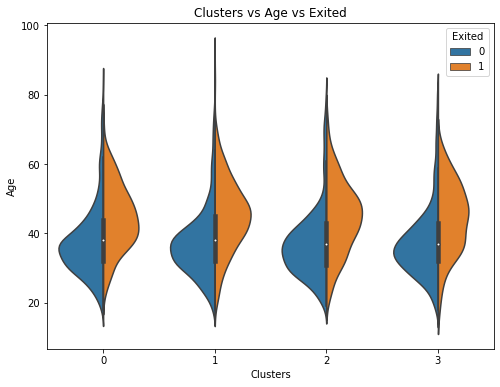

In [51]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Clusters', y='Age', hue='Exited', split=True, data=df_clusters)

plt.title('Clusters vs Age vs Exited')

Text(0.5, 1.0, 'Clusters vs CreditScore vs Exited')

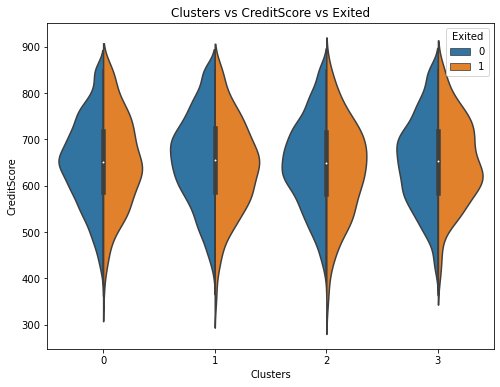

In [52]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Clusters', y='CreditScore', hue='Exited', split=True,data=df_clusters)

plt.title('Clusters vs CreditScore vs Exited')

Text(0.5, 1.0, 'Clusters vs Balance vs Exited')

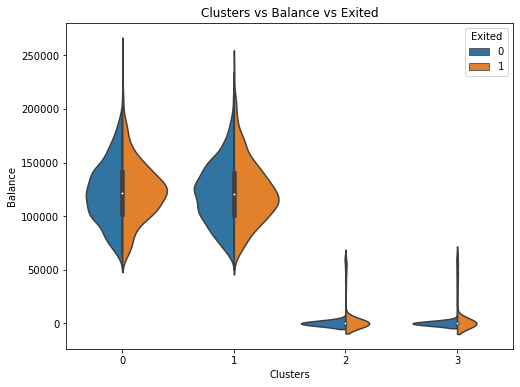

In [53]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Clusters', y='Balance', hue='Exited', split=True,data=df_clusters)

plt.title('Clusters vs Balance vs Exited')

Text(0.5, 1.0, 'Clusters vs EstimatedSalary vs Exited')

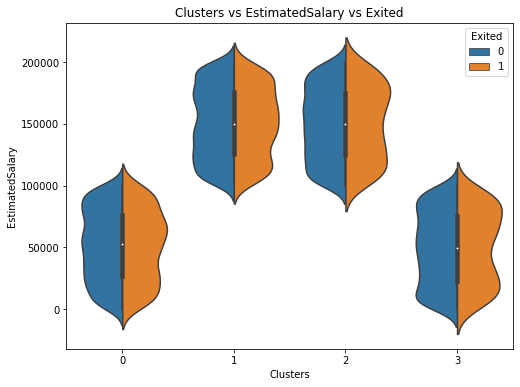

In [54]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Clusters', y='EstimatedSalary', hue='Exited', split=True,data=df_clusters)

plt.title('Clusters vs EstimatedSalary vs Exited')

Text(0.5, 1.0, 'Balance vs EstimatedSalary vs Clusters')

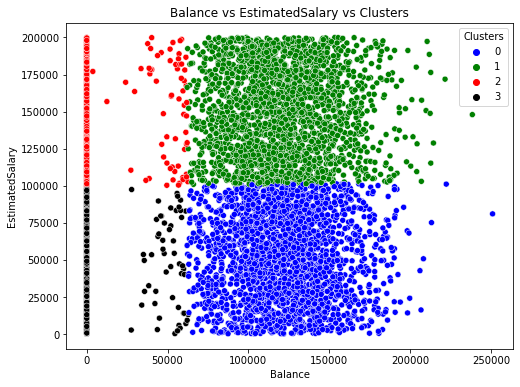

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Clusters',data=df_clusters,palette=['blue','green','red','black'])

plt.title('Balance vs EstimatedSalary vs Clusters')

In [56]:
# generate summary statistics of each cluster
df_clusters.groupby('Clusters')['Exited'].describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,2163.0,0.244568,0.429930,0.0,0.0,0.0,0.0,1.0
1,2178.0,0.246556,0.431105,0.0,0.0,0.0,0.0,1.0
2,1342.0,0.148286,0.355516,0.0,0.0,0.0,0.0,1.0
3,1317.0,0.142749,0.349949,0.0,0.0,0.0,0.0,1.0


## Pre-Processing

In [57]:
# X = df.drop(['CustomerId','Surname','Geography','Gender','Exited'], axis=1)
# y = df['Exited']

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
X = df.set_index('CustomerId').drop(['Surname','Geography','Gender','Exited'], axis=1)
y = df['Exited']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Handle Class Imbalance

In [60]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.5,random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

### Standardize Data

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index ,columns=X_train.columns)

X_test_scaled = scaler.fit_transform(X_test.values)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index ,columns=X_test.columns)

## Modelling

In [62]:
#!pip install xgboost

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [64]:
# Models for Classification
models = [('LR', LogisticRegression(random_state=42)),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier(random_state=42)),
          ('RF', RandomForestClassifier(random_state=42)),
          ('SVC', SVC(gamma='auto',random_state=42)),
          ('GB', GradientBoostingClassifier(random_state = 42)),
          ("LightGBM", LGBMClassifier(random_state=42))]

results = []
names = []
scores = ['accuracy','precision','recall','roc_auc']
for name, model in models:
    for score in scores:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring=score)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %s: %f (%f)" % (name, score, cv_results.mean(), cv_results.std())
        print(msg)
    print('\n___________________________________________________________')

LR: accuracy: 0.716226 (0.119060)
LR: precision: 0.544324 (0.211600)
LR: recall: 0.428430 (0.048468)


C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File 

LR: roc_auc: nan (nan)

___________________________________________________________
KNN: accuracy: 0.776803 (0.060884)
KNN: precision: 0.612011 (0.182716)
KNN: recall: 0.602519 (0.023799)


C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File 

KNN: roc_auc: nan (nan)

___________________________________________________________
DT: accuracy: 0.745913 (0.031855)
DT: precision: 0.540506 (0.205032)
DT: recall: 0.633844 (0.037293)


C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File 

DT: roc_auc: nan (nan)

___________________________________________________________
RF: accuracy: 0.813101 (0.059825)
RF: precision: 0.686594 (0.149230)
RF: recall: 0.618099 (0.046747)


C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File 

RF: roc_auc: nan (nan)

___________________________________________________________
SVC: accuracy: 0.788702 (0.101384)
SVC: precision: 0.693276 (0.143614)
SVC: recall: 0.526664 (0.023097)


C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File 

SVC: roc_auc: nan (nan)

___________________________________________________________
GB: accuracy: 0.796154 (0.083502)
GB: precision: 0.680719 (0.153595)
GB: recall: 0.576711 (0.036502)


C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File 

GB: roc_auc: nan (nan)

___________________________________________________________
LightGBM: accuracy: 0.800962 (0.067649)
LightGBM: precision: 0.667805 (0.157066)
LightGBM: recall: 0.605047 (0.043408)
LightGBM: roc_auc: nan (nan)

___________________________________________________________


C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File 

## Model Tuning

In [65]:
# I'll tune the 2 best performing models

In [66]:

# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X_train, y_train)

In [67]:
# LightGBM: 
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X_train, y_train)

In [68]:
# evaluate each model in turn
models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
scores = ['accuracy','precision','recall','roc_auc']
for name, model in models:
    for score in scores:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring=score)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %s: %f (%f)" % (name, score, cv_results.mean(), cv_results.std())
        print(msg)
    print('\n___________________________________________________________')

LightGBM: accuracy: 0.794832 (0.090942)
LightGBM: precision: 0.687145 (0.147251)
LightGBM: recall: 0.563779 (0.032313)


C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File 

LightGBM: roc_auc: nan (nan)

___________________________________________________________
GB: accuracy: 0.797476 (0.077214)
GB: precision: 0.674401 (0.153343)
GB: recall: 0.588546 (0.038850)
GB: roc_auc: nan (nan)

___________________________________________________________


C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File 

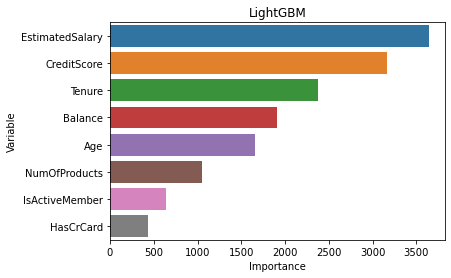

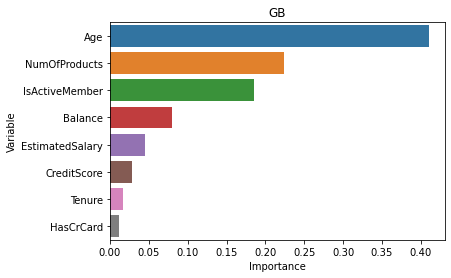

In [69]:
for name, model in models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Importance')
        plt.ylabel('Variable')
        plt.title(name)
        plt.show()

## T-Test

In [70]:

from scipy.stats import ttest_1samp

In [71]:

t_stat, p_value = ttest_1samp(df[df.Exited==1].Age, popmean=df.Age.mean())
print("T-statistic value: ", t_stat,3)
print("P-Value: ", p_value)

T-statistic value:  27.35387438024691 3
P-Value:  1.4372136158185132e-140


In [72]:

t_stat, p_value = ttest_1samp(df[df.Exited==1].CreditScore, popmean=df.CreditScore.mean())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -2.3291906789604067
P-Value:  0.019946347165310532


In [73]:

t_stat, p_value = ttest_1samp(df[df.Exited==1].EstimatedSalary, popmean=df.EstimatedSalary.mean())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  1.0719257993526408
P-Value:  0.2838804025968234


## Artificial Neural Networks

In [74]:
#Initialise ANN
classifier = Sequential()

#Add input layer
classifier.add(Dense(units=11,activation='relu'))

#Add first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#Add second hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#Add third hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#Add output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [75]:
#optimizer
opt = Adam(learning_rate=0.01)

#compile
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
#Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [77]:
#Fit model
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stop)

Epoch 1/1000
558/558 [==============================] - 3s 3ms/step - loss: 0.4697 - accuracy: 0.7914 - val_loss: 0.8079 - val_accuracy: 0.4953
Epoch 2/1000
558/558 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.8129 - val_loss: 0.7487 - val_accuracy: 0.5481
Epoch 3/1000
558/558 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.8213 - val_loss: 0.6994 - val_accuracy: 0.5448
Epoch 4/1000
558/558 [==============================] - 1s 2ms/step - loss: 0.4198 - accuracy: 0.8199 - val_loss: 0.6753 - val_accuracy: 0.6256
Epoch 5/1000
558/558 [==============================] - 1s 2ms/step - loss: 0.4200 - accuracy: 0.8188 - val_loss: 0.7461 - val_accuracy: 0.5222
Epoch 6/1000
558/558 [==============================] - 1s 2ms/step - loss: 0.4061 - accuracy: 0.8260 - val_loss: 0.6656 - val_accuracy: 0.6471
Epoch 7/1000
558/558 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.8177 - val_loss: 0.6527 - val_accuracy:

In [78]:
model_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

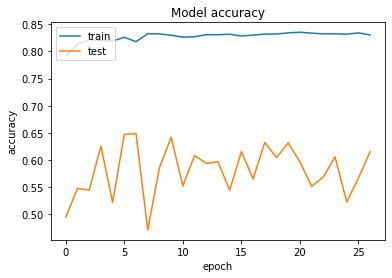

In [79]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

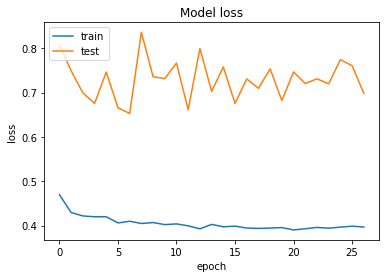

In [80]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [81]:
#make predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

94/94 [==============================] - 0s 2ms/step


Text(69.0, 0.5, 'Actual')

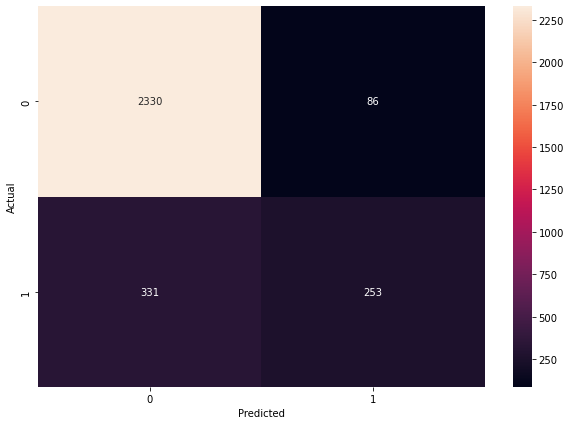

In [82]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.43      0.55       584

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.85      3000



In [84]:
#use model to predict probability that given y value is 1
y_pred_proba = classifier.predict(X_test)

#calculate AUC of model
auc = roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

94/94 [==============================] - 0s 2ms/step
0.8347149142701624


(array([1118.,  827.,   71.,  442.,  203.,  110.,   53.,   66.,   46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <BarContainer object of 9 artists>)

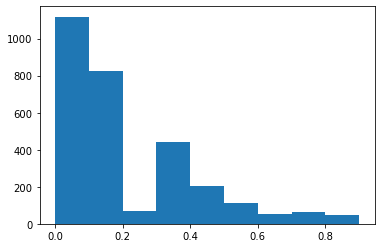

In [85]:
plt.hist(y_pred_proba,bins=[x/10 for x in range(10)])

In [86]:
y_pred_proba.reshape(1,-1)[0]

array([0.0956465 , 0.05986934, 0.11394776, ..., 0.13293368, 0.10914436,
       0.14554732], dtype=float32)

In [87]:
prediction_results = pd.Series(y_pred_proba.reshape(1,-1)[0]).round(2).rename('Prediction')


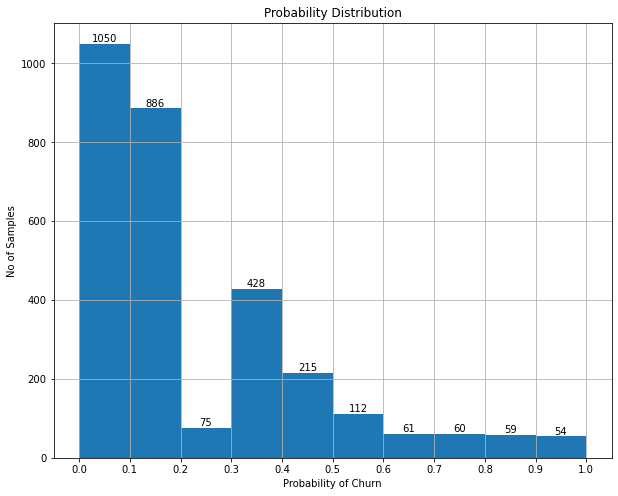

In [88]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_xticks([x/10 for x in range(11)])
ax.set_title('Probability Distribution')
ax.set_xlabel('Probability of Churn')
ax.set_ylabel('No of Samples')



prediction_results.hist(ax = ax, bins=[x/10 for x in range(11)])
for c in ax.containers:
    ax.bar_label(c)

In [89]:
combined_actual_predicted = pd.merge(df[['CustomerId','Exited']],prediction_results, left_index=True, right_index=True)

In [90]:
combined_actual_predicted.shape

(3000, 3)

Text(0.5, 1.0, 'Not Exited vs Exited Comparison')

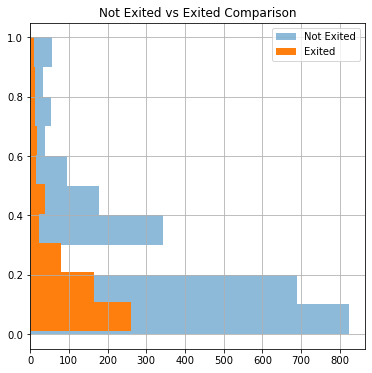

In [91]:
combined_actual_predicted[combined_actual_predicted.Exited.astype(int)==0].Prediction.hist(figsize=(6,6),alpha=0.5,orientation='horizontal')
combined_actual_predicted[combined_actual_predicted.Exited.astype(int)==1].Prediction.hist(figsize=(6,6),orientation='horizontal')

plt.legend(['Not Exited','Exited'])
plt.title('Not Exited vs Exited Comparison')